Keras의 특징 
- User Friendliness : 다양한 모델을 쉽게 구축 가능 
- Modularity : 레이어,손실함수, 활성화 함수등 이러한 모듈등을 서로 조합하여 모델 구축 가능 



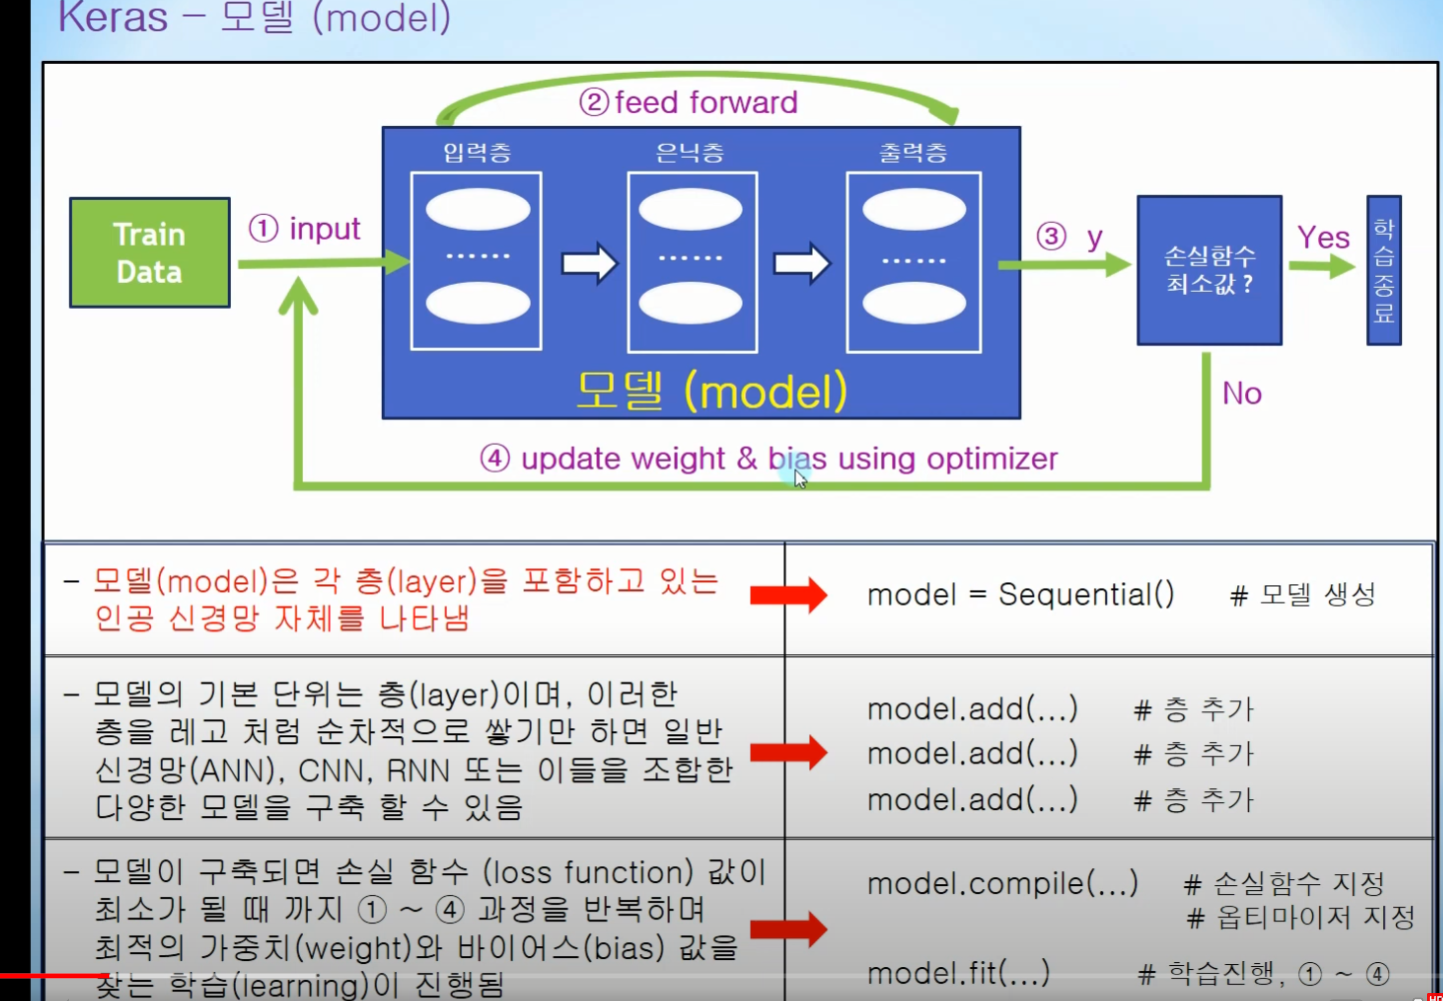

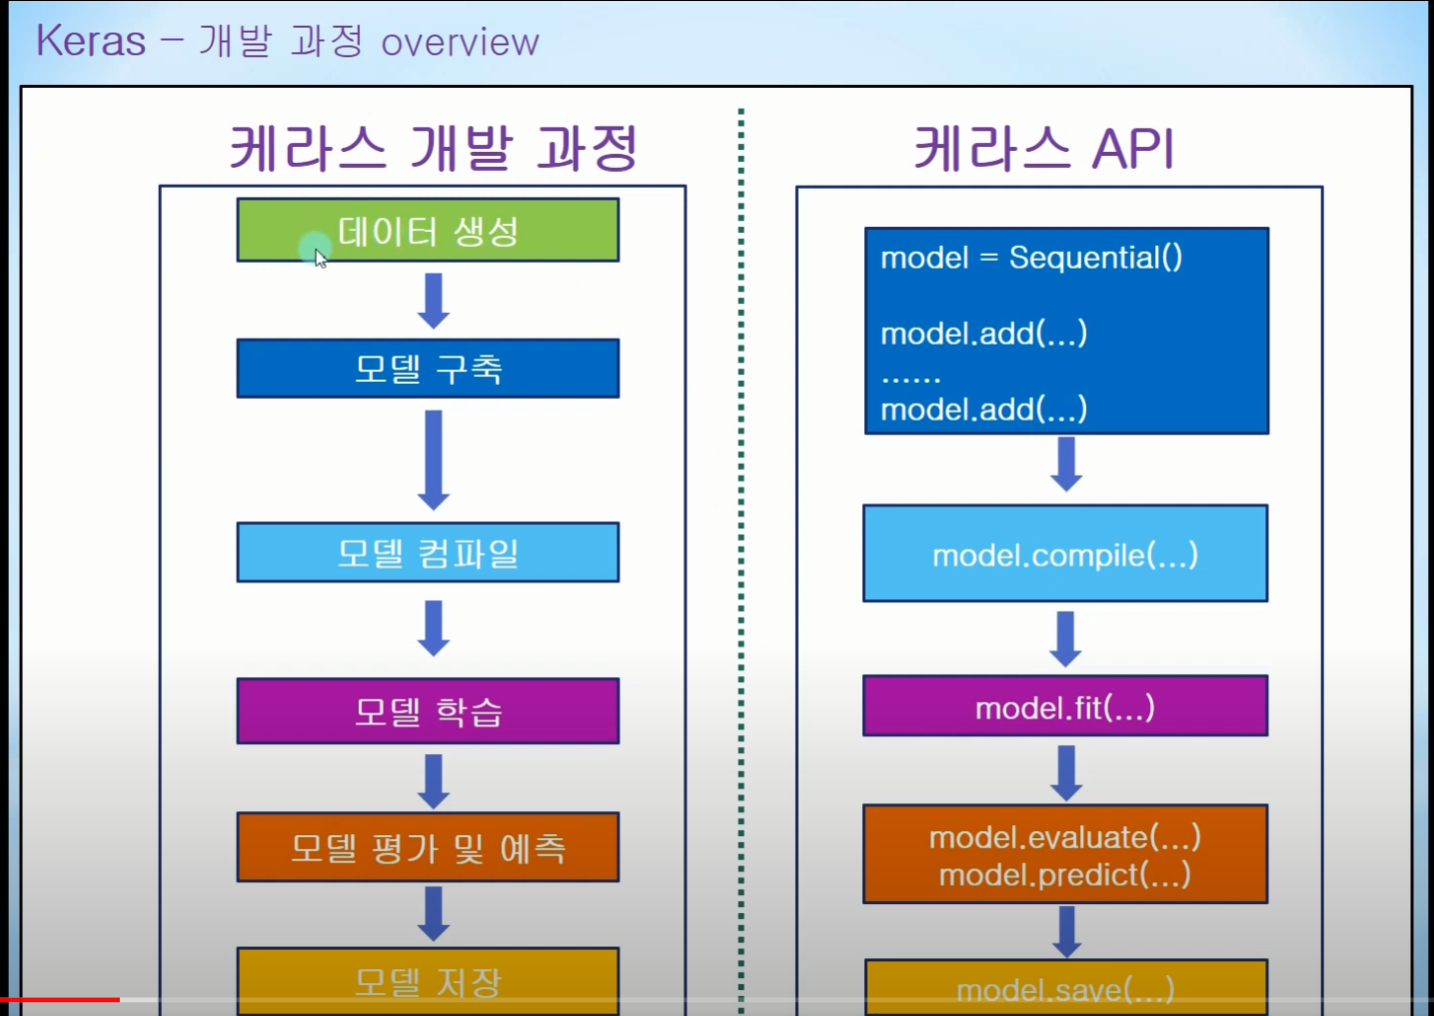

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

import numpy as np

print(tf.__version__)

2.7.0


In [4]:
# [1] 데이터셋 생성

x_data = np.array([1, 2, 3, 4, 5, 6])
t_data = np.array([3, 4, 5, 6, 7, 8])  

In [7]:
# [2] 모델 (model) 구축

model = Sequential()    # 모델

# Flatten은 입력으로 들어오는 다차원 데이터를 1차원으로 정렬하기 위해 사용된 레이어, input_shape(1,)
model.add(Flatten(input_shape=(1,)))       # 입력층 
#Dense는 각 층의 엽력과 출력 사이에 모든 노드가 연결되어 있는 층을 나타냄, 첫번째 인자는 출력 노드수 
# linear, sigmoid, softmax, ReLU
model.add(Dense(5, activation='linear'))   # 출력층

#위 두개를 합쳐서 밑에 처럼 구현 가능
# model.add(Dense(1, input_shape=(1,), activation='linear'))  # 입력층 + 출력층

In [ ]:
# [3] 모델 (model) 컴파일 및 summary

#Compile 구축된 모델을 기계가 이해하게 하는 과정

model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')
#최적화 알고리즘 SGD, 학습율  1e-2, 오차함수 mse
#손실함수 종류 : 평균제곱오차(MSE), 이진분류 - binary_crossentropy, e
#다중 클래스 분류 - categorical_crossentropy, 원핫 안하고 할 경우 sparse_categorical_crossentropy

model.summary()

In [12]:
# [4] 모델 학습

#model.fit(입력데이터, 정답데이터, epochs = (반복), batch_size = , verbose = (과정 시각화), validation_split = (검증데이터없으면~))
hist = model.fit(x_data, t_data, epochs=1000, verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0064
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0064
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0064
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0063
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0063
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 11/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 12/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0063
Epoch 13/1000
1/1 [==============================

In [15]:
#모델 저장도 가능
model.save("model_test.h5")

#odel = tensorflow.keras.models.load_model("모델이름")

In [16]:
# [5] 모델 (model) 사용

result = model.predict(np.array([-3.1, 3.0, 3.5, 15.0, 20.1]))

print(result)     

[[-1.2374116 -1.2701184 -1.2524617 -1.2375923 -1.2564952]
 [ 4.976149   4.970472   4.973536   4.9761176  4.9728365]
 [ 5.4854574  5.4819956  5.483864   5.4854383  5.4834375]
 [17.199549  17.247042  17.221401  17.19981   17.22726  ]
 [22.394493  22.464586  22.426743  22.394878  22.43539  ]]
